In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

In [203]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

rf = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

rf['totalcharges'] = pd.to_numeric(rf['TotalCharges'], errors='coerce')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [204]:
df["CustomerID"] = df["customerID"].str[:4].astype(int)


In [205]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerID
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,5575
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237


In [206]:


df = df.drop('customerID', axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [207]:
df.head()

df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 0)
df['Partner'] = df['Partner'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x : 1 if x == 'Yes' else 0)
df['PhoneService'] = df['PhoneService'].apply(lambda x : 1 if x == 'Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Churn'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)



In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [209]:

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']



In [210]:
df['totalcharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

num_cols = ['tenure', 'MonthlyCharges', 'totalcharges']


In [211]:
df.info()

df = df.drop('TotalCharges', axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


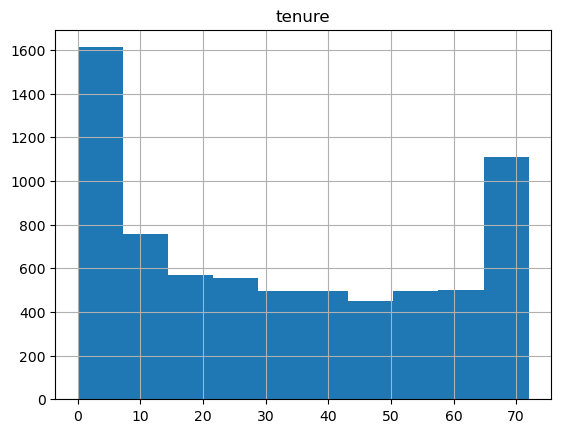

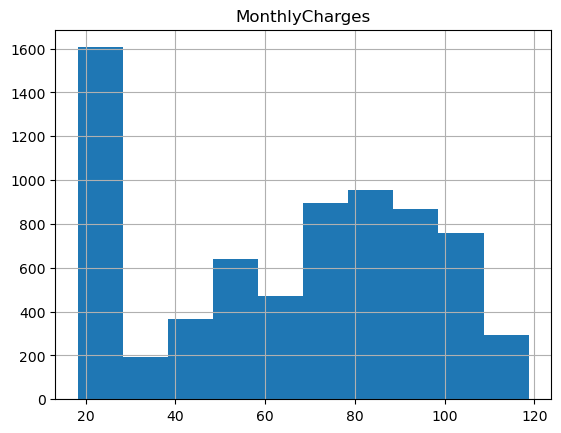

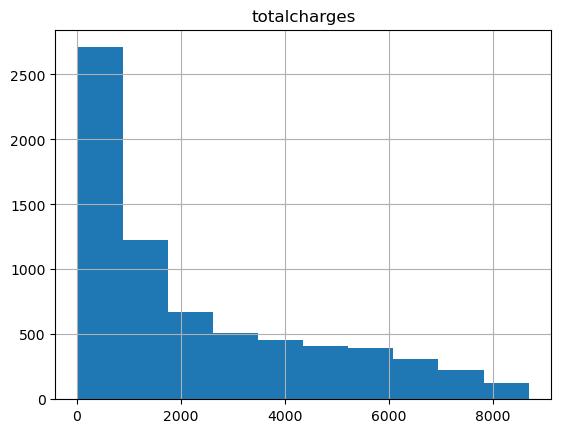

In [212]:
for i in num_cols:
    df.hist(i)
    plt.title(i)
    plt.show()

In [213]:
df[num_cols].skew()

tenure            0.239540
MonthlyCharges   -0.220524
totalcharges      0.961642
dtype: float64

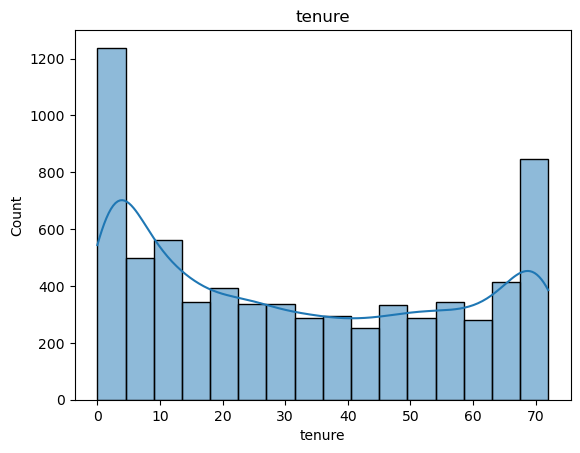

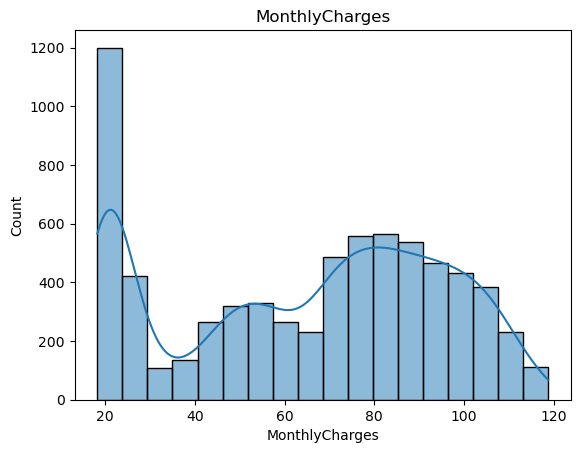

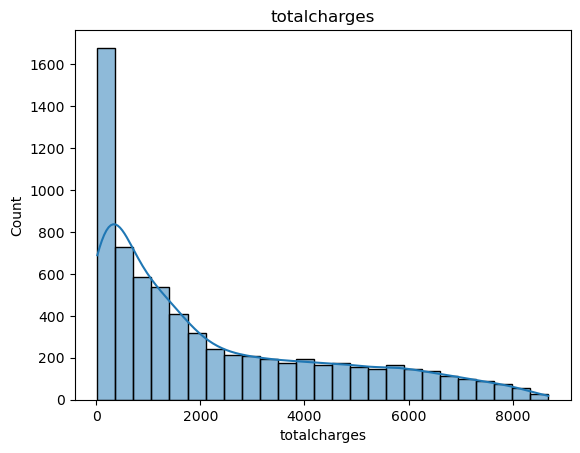

In [214]:
for i in num_cols:
    sns.histplot(df[i], kde=True)
    plt.title(i)
    plt.show()

In [215]:
df['totalcharges'] = np.log1p(df['totalcharges'])


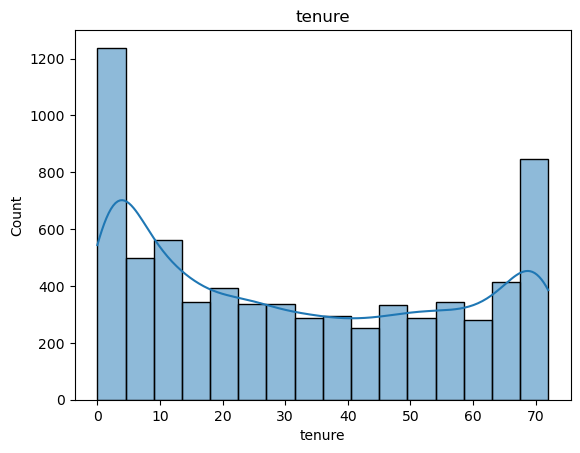

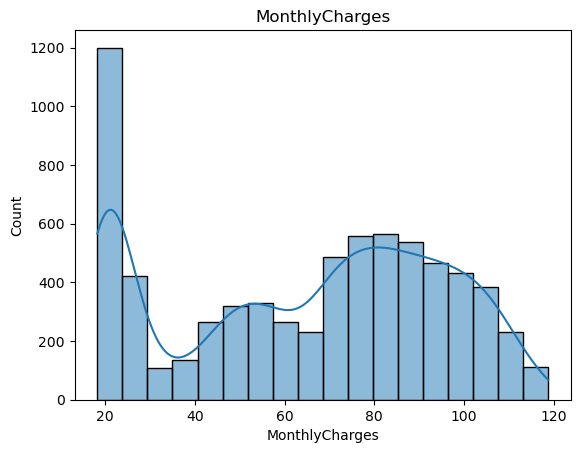

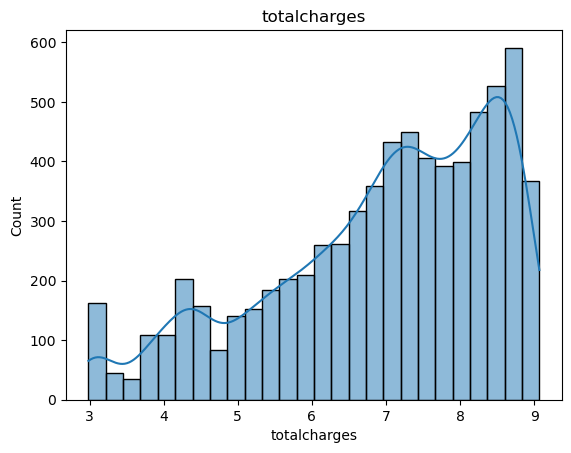

In [216]:
for i in num_cols:
    sns.histplot(df[i], kde=True)
    plt.title(i)
    plt.show()

In [217]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,CustomerID,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,0.265370,4997.269345,6.943387
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,0.441561,2855.656466,1.546438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,2.000000,2.985682
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,0.000000,2575.500000,5.997571
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000,4992.000000,7.243138
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,1.000000,7451.000000,8.241634
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000,9995.000000,9.069445


In [218]:
# Calculate Q1 and Q3
Q1 = df['totalcharges'].quantile(0.25)
Q3 = df['totalcharges'].quantile(0.75)

# Interquartile range
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Q1: 5.997570842382899
Q3: 8.241633999728002
IQR: 2.244063157345103
Lower bound: 2.6314761063652448
Upper bound: 11.607728735745656


In [219]:
numeric_col = []

for i in df:
    if df[i].dtype in ['int64' or 'float64']:
        numeric_col.append(i)

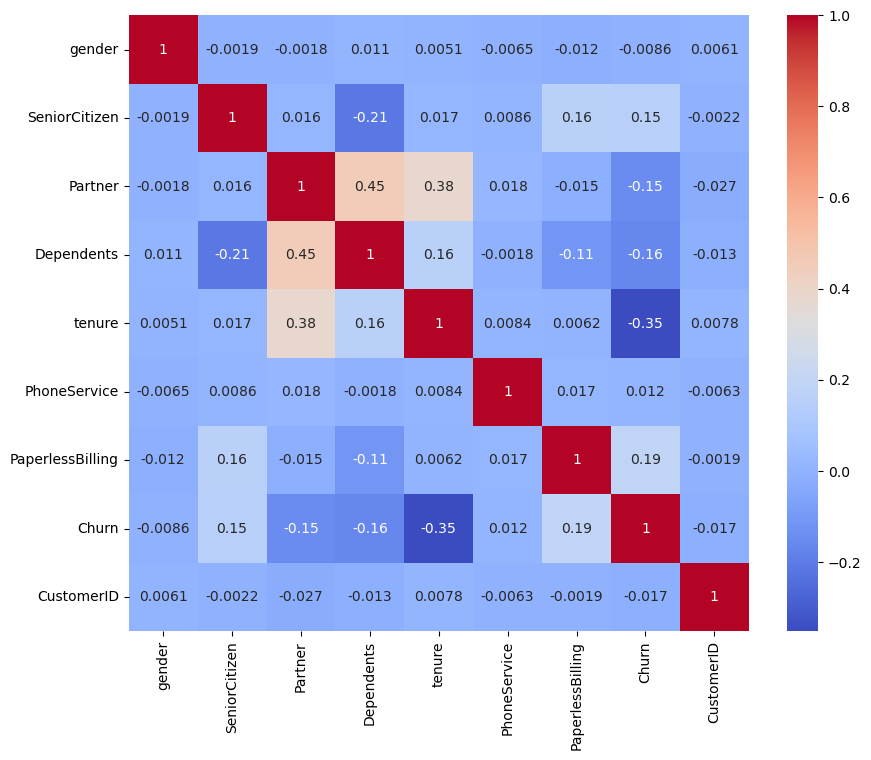

In [220]:
numes = df[numeric_col]

plt.figure(figsize=(10,8))
sns.heatmap(numes.corr(), annot=True, cmap='coolwarm')
plt.show()

In [221]:
paki = df[df['tenure'] >=0 ]

paki['Churn'].value_counts()

curry = df[(df['Partner'] == 1) & (df['Dependents'] == 1)]


curry['Churn'].value_counts()

Churn
0    1500
1     249
Name: count, dtype: int64

In [222]:
df['senior_stingy'] = ((df['SeniorCitizen'] == 1) & (df['tenure'] <= 35)).astype(int)

df['ExtraSpent'] = rf['totalcharges'] - df['MonthlyCharges']


In [223]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,CustomerID,totalcharges,senior_stingy,ExtraSpent
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0,7590,3.429137,0,0.00
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0,5575,7.544597,0,1832.55
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1,3668,4.692723,0,54.30
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0,7795,7.518471,0,1798.45
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1,9237,5.028148,0,80.95


In [224]:
df = df.drop('CustomerID', axis=1)

In [225]:
for i in cat_cols:
    print(df[i].value_counts())

#phoneservice, multiplelines, internetservice

steve = df[df['PhoneService'] == 1]

steve['Churn'].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
PhoneService
1    6361
0     682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
Str

Churn
0    4662
1    1699
Name: count, dtype: int64

In [226]:
#phoneservice, multiplelines, internetservice
steve = df[df['PaymentMethod'] == 'Credit card (automatic)']

steve['Churn'].value_counts()

Churn
0    1290
1     232
Name: count, dtype: int64

In [227]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,totalcharges,senior_stingy,ExtraSpent
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0,3.429137,0,0.00
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0,7.544597,0,1832.55
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1,4.692723,0,54.30
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0,7.518471,0,1798.45
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1,5.028148,0,80.95


In [228]:
mackie = df[df['MonthlyCharges'] >= 106]

mackie['Churn'].value_counts()



Churn
0    345
1     82
Name: count, dtype: int64

In [229]:
df['PremiumMember'] = (df['MonthlyCharges'] >= 100).astype(int)

In [230]:
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   totalcharges                           7032 non-null   float64
 10  senior_stingy                          7043 non-null   int64  
 11  Extr

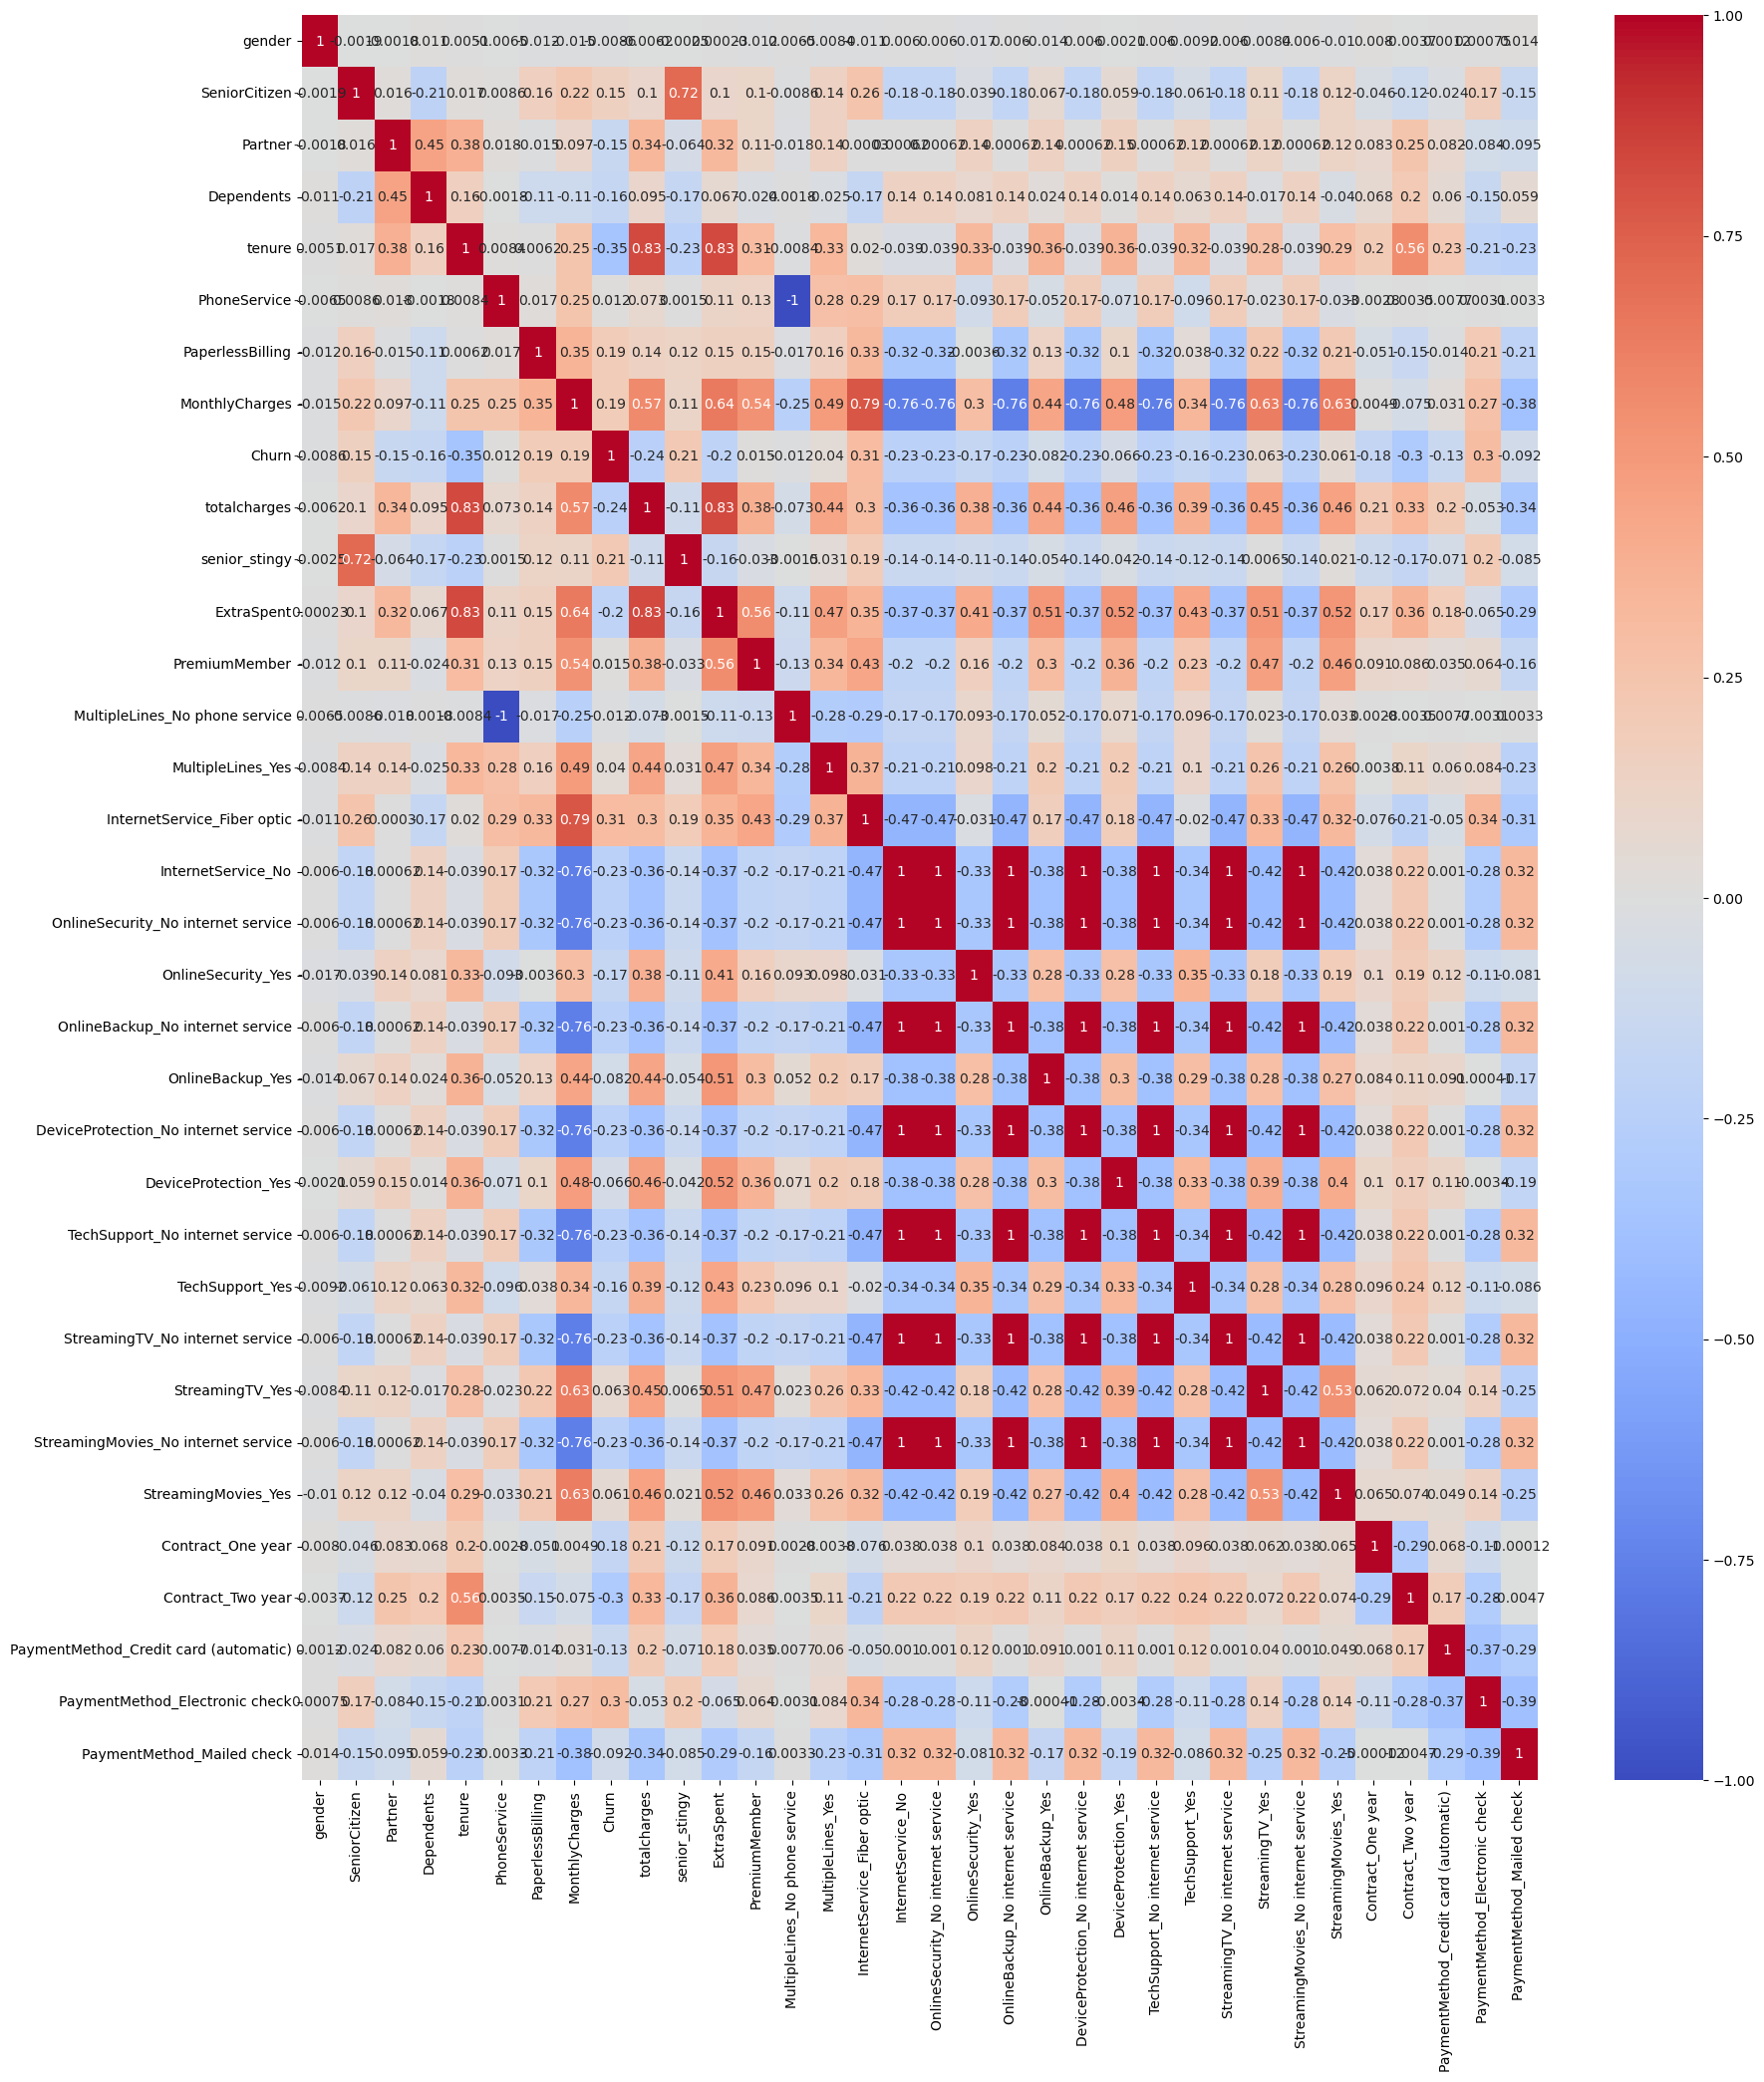

In [234]:
plt.figure(figsize=(20, 23))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [239]:
df = df.dropna()


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

X = df.drop('Churn', axis=1)
y= df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [241]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)


y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7960199004975125
[[919 114]
 [173 201]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC: 0.8399073877548908


In [242]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))



Accuracy: 0.7967306325515281
[[932 101]
 [185 189]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC: 0.6363494002722976


C:\Users\awais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [244]:
importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False)

totalcharges                             0.140716
tenure                                   0.139416
MonthlyCharges                           0.129372
ExtraSpent                               0.122929
Contract_Two year                        0.044362
InternetService_Fiber optic              0.039733
PaymentMethod_Electronic check           0.035774
Contract_One year                        0.026427
OnlineSecurity_Yes                       0.023982
gender                                   0.023003
TechSupport_Yes                          0.022819
PaperlessBilling                         0.021521
Partner                                  0.018909
OnlineBackup_Yes                         0.018614
Dependents                               0.017970
MultipleLines_Yes                        0.015967
DeviceProtection_Yes                     0.014502
StreamingMovies_Yes                      0.013648
StreamingTV_Yes                          0.013558
SeniorCitizen                            0.012297


In [245]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=400, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder = False, eval_metric = 'logloss')

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))



C:\Users\awais\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:52:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.767590618336887
[[888 145]
 [182 192]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

ROC AUC: 0.6363494002722976


C:\Users\awais\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
